In [ ]:
import numpy as np
import cv2
import PIL.Image as Image
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

In [ ]:
IMAGE_SHAPE = (224, 224)
classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


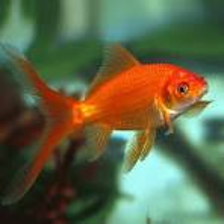

In [20]:
gold_fish = Image.open("/content/drive/MyDrive/datasets/goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [21]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [22]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [24]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 0s 161ms/step


array([[ 0.31649545,  1.6848301 , 10.011757  , ..., -1.1243356 ,
         0.21421373, -1.2067864 ]], dtype=float32)

In [25]:
predicted_label_index = np.argmax(result)
predicted_label_index

np.int64(2)

In [27]:
image_labels = []
with open("/content/drive/MyDrive/datasets/ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [28]:
image_labels[predicted_label_index]

'goldfish'